In [1]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
import numpy as np
import os

In [3]:
model = tf.keras.models.load_model("Trained_Skin_Disease_model.keras", compile=False)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         6,006 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,513,438 (21.03 MB)

 Trainable params: 5,489,038 (20.94 MB)

 Non-trainable params: 24,400 (95.31 KB)

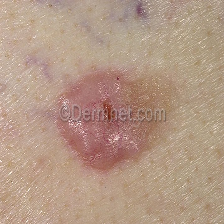

In [11]:
img_path = './dataset/test/6. Malign/basal-cell-carcinoma-lesion-106.jpg'
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
img

In [12]:
img_path = './dataset/test/6. Malign/basal-cell-carcinoma-lesion-106.jpg'
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [13]:
x.shape

(1, 224, 224, 3)

In [14]:
pred = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [15]:
pred

array([[0.04090603, 0.03830046, 0.02965205, 0.0213912 , 0.12404227,
        0.745708  ]], dtype=float32)

In [16]:
class_name = ['1. Enfeksiyonel','2. Ekzama','3. Akne','4. Pigment','5. Benign','6. Malign']
result_index = np.argmax(pred)
print("Model Prediction:", class_name[result_index])

Model Prediction: 6. Malign
